<a href="https://colab.research.google.com/github/Vatsalparsaniya/Deep_Learning/blob/master/Apple_Pear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from fastai.vision import *
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai import *
import numpy as np

Apple Classifier first step towards DL

Download Red Apple images

In [0]:
folder  = 'Red_Apple'
file = "URL_Red_Apple.txt"

In [0]:
path = Path('/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [57]:
download_images(path/file,dest=dest,max_pics=200,max_workers=0)

Error https://d34djr6tftzxx5.cloudfront.net/image/cache/catalog/cropped%20images/Apple-Red-800x800.jpg HTTPSConnectionPool(host='d34djr6tftzxx5.cloudfront.net', port=443): Max retries exceeded with url: /image/cache/catalog/cropped%20images/Apple-Red-800x800.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f26f8a7eef0>: Failed to establish a new connection: [Errno -5] No address associated with hostname',))


Download Green Apple images

In [0]:
folder  = 'Green_Pear'
file = "URL_Green_Pear.txt"

In [0]:
path = Path('/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [61]:
download_images(path/file,dest=dest,max_pics=200,max_workers=0)

Error https://p7.hiclipart.com/preview/33/242/535/pear-fruit-watercolor-painting-pear.jpg HTTPSConnectionPool(host='p7.hiclipart.com', port=443): Read timed out. (read timeout=4)


Define classes

In [0]:
classes = ["Red_Apple","Green_Pear"]

Now we have to delete images if downloaded images is not in proper 

In [63]:
for c in classes:
  verify_images(path/c,delete=True,max_workers=8)

cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000002.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000033.png'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000037.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000057.png'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000083.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000102.png'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000109.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000113.png'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000124.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000152.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Red_Apple/00000153.jpg'>


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Green_Pear/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Green_Pear/00000071.png'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Green_Pear/00000083.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Green_Pear/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Green_Pear/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Green_Pear/00000099.png'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Green_Pear/00000139.png'>


# View Data

In [64]:
path

PosixPath('/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear')

In [65]:
np.random.seed(30)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,
                                  ds_tfms=get_transforms(),size=244,num_workers=4)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (224 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Red_Apple,Red_Apple,Red_Apple,Red_Apple,Red_Apple
Path: /content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear;

Valid: LabelList (55 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Green_Pear,Green_Pear,Red_Apple,Red_Apple,Green_Pear
Path: /content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear;

Test: None

So We Have 244 images for Train-set and 55 images for validation set 

In [66]:
data.classes

['Green_Pear', 'Red_Apple']

In [67]:
data

ImageDataBunch;

Train: LabelList (224 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Red_Apple,Red_Apple,Red_Apple,Red_Apple,Red_Apple
Path: /content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear;

Valid: LabelList (55 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Green_Pear,Green_Pear,Red_Apple,Red_Apple,Green_Pear
Path: /content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear;

Test: None

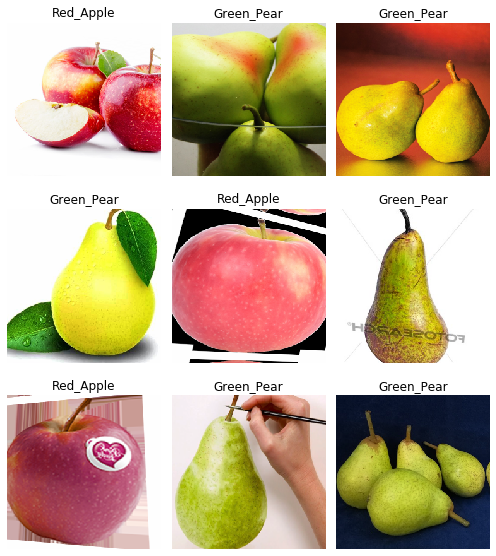

In [68]:
data.show_batch(rows=3,figsize=(7,8))

In [69]:
data.classes , data.c , len(data.train_ds),len(data.valid_ds)

(['Green_Pear', 'Red_Apple'], 2, 224, 55)

In [75]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [76]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.928618,0.334187,0.145455,01:23
1,0.505727,0.207518,0.090909,01:24
2,0.352221,0.108105,0.072727,01:22


In [0]:
learn.save("/content/drive/My Drive/Colab Notebooks/Apple_Pear_stage-1")

In [0]:
learn.unfreeze()

In [79]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


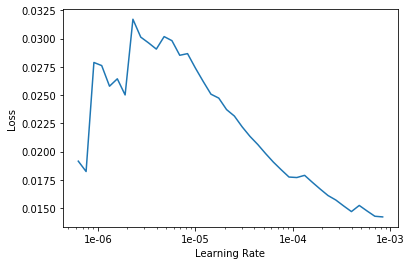

In [80]:
learn.recorder.plot()

In [81]:
learn.fit_one_cycle(2,max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.018724,0.015462,0.000000,01:45
1,0.014580,0.010465,0.000000,01:45


In [0]:
learn.save("/content/drive/My Drive/Colab Notebooks/Apple_Pear_stage-2")

In [0]:
learn.load('/content/drive/My Drive/Colab Notebooks/Apple_Pear_stage-2');

In [86]:
interp = ClassificationInterpretation.from_learner(learn)

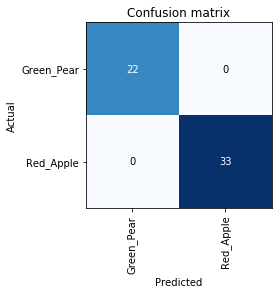

In [87]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

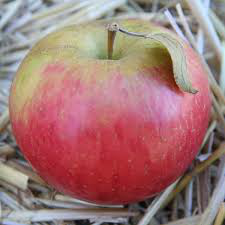

In [100]:
Apple_img = open_image('/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Test/Apple.jpg')
Apple_img

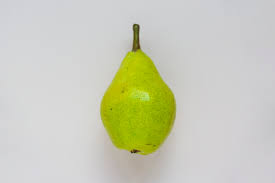

In [101]:
Pear_img = open_image('/content/drive/My Drive/Colab Notebooks/Data/Apple_VS_Pear/Test/Pear.jpg')
Pear_img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(Apple_img)

In [97]:
pred_class,pred_idx,outputs

(Category Red_Apple, tensor(1), tensor([5.7740e-06, 9.9999e-01]))

In [0]:
pred_class,pred_idx,outputs = learn.predict(Pear_img)

In [99]:
pred_class,pred_idx,outputs

(Category Green_Pear, tensor(0), tensor([1.0000e+00, 3.6225e-13]))